# Package Management

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

# Load Data Set

In [14]:
salary = pd.read_csv('data\\Salary_dataset.csv')
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [18]:
salary.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [20]:
salary.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


# Exploration

In [ ]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


Observation:
- Experience and Salary are not on the same scale -this will need to be scaled.
- Salary field does not follow uniform distribution.
- Experience Years also do not have uniqform distribution.
- We can use log on both fields to scale or directly use StandardScaler which will bring mean to 0 and std to 1.

array([[<Axes: title={'center': 'Salary'}>]], dtype=object)

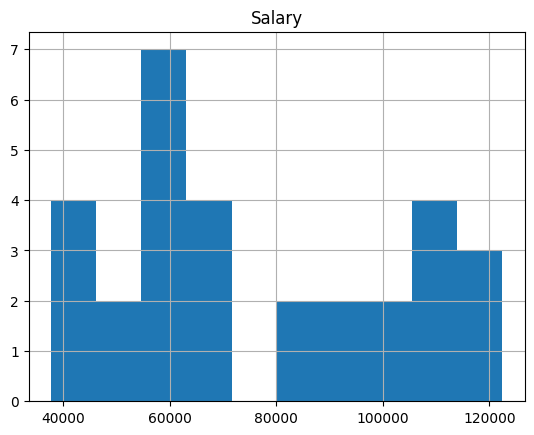

In [22]:
salary.hist('Salary')

array([[<Axes: title={'center': 'YearsExperience'}>]], dtype=object)

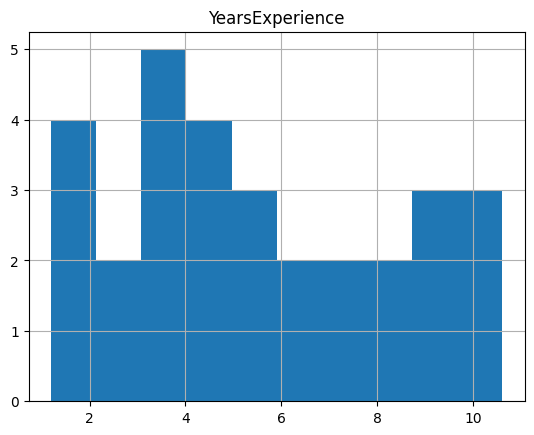

In [24]:
salary.hist('YearsExperience')

# Data Preparation

In [27]:
salary.sample(5)

,YearsExperience,Salary
4,2.3,39892.0
1,1.4,46206.0
16,5.2,66030.0
7,3.3,54446.0
28,10.4,122392.0


In [37]:
X = salary['YearsExperience'].to_frame()
y = salary['Salary']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

# Model Training

In [40]:
lr = LinearRegression()
ridge = Ridge(alpha = 0.1)
lasso = Lasso(alpha = 0.1)

In [45]:
lr_model = lr.fit(X_train, y_train)
ridge_model = ridge.fit(X_train, y_train)
lasso_model = lasso.fit(X_train, y_train)

# Prediction

In [47]:
lr_pred = lr_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

# Evaluation

In [49]:
lr_rmse = root_mean_squared_error(y_test, lr_pred)
ridge_rmse = root_mean_squared_error(y_test, ridge_pred)
lasso_rmse = root_mean_squared_error(y_test, lasso_pred)

lr_rmse, ridge_rmse, lasso_rmse

(7059.043621901506, 7059.991269048929, 7059.046013344014)

Observation:
- Linear Regression is doing better.
- Lasso is doing slightly better than ridge.

In [59]:
pd.DataFrame([lr_model.coef_,ridge_model.coef_, lasso_model.coef_], columns = X_train.columns)

,YearsExperience
0,9423.815323
1,9419.087488
2,9423.803276


# Pipeline Creation

In [60]:
from sklearn.pipeline import Pipeline

In [79]:
lr_pipeline = Pipeline([
    ('lr', LinearRegression())
])

ridge_pipeline = Pipeline([
    ('ridge', Ridge(alpha = 0.1))
])

lasso_pipeline = Pipeline([
    ('lasso', Lasso(alpha = 0.1))
])

In [80]:
lr_pipeline.fit(X_train, y_train)
ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

,steps,"[('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False


In [81]:
lr_pipeline_pred = lr_pipeline.predict(X_test)
ridge_pipeline_pred = ridge_pipeline.predict(X_test)
lasso_pipeline_pred = lasso_pipeline.predict(X_test)

In [83]:
lr_pipeline_rmse = root_mean_squared_error(y_test, lr_pipeline_pred)
ridge_pipeline_rmse = root_mean_squared_error(y_test, ridge_pipeline_pred)
lasso_pipeline_rmse = root_mean_squared_error(y_test, lasso_pipeline_pred)

In [87]:
pd.DataFrame([lr_pipeline_rmse, ridge_pipeline_rmse, lasso_pipeline_rmse], columns = X_train.columns)

,YearsExperience
0,7059.043622
1,7059.991269
2,7059.046013
